C:\Users\Dell\AppData\Local\Temp\ipykernel_10052\4230539020.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Route_ID',y='Passengers', ax=axes[0,0],palette='Blues')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10052\4230539020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay,x='Route_ID',y='Delayed_by_Mins',ax=axes[0,1],palette='Reds')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10052\4230539020.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Route_ID',y='Load_ratio',estimator='mean',ax=axes[1,0

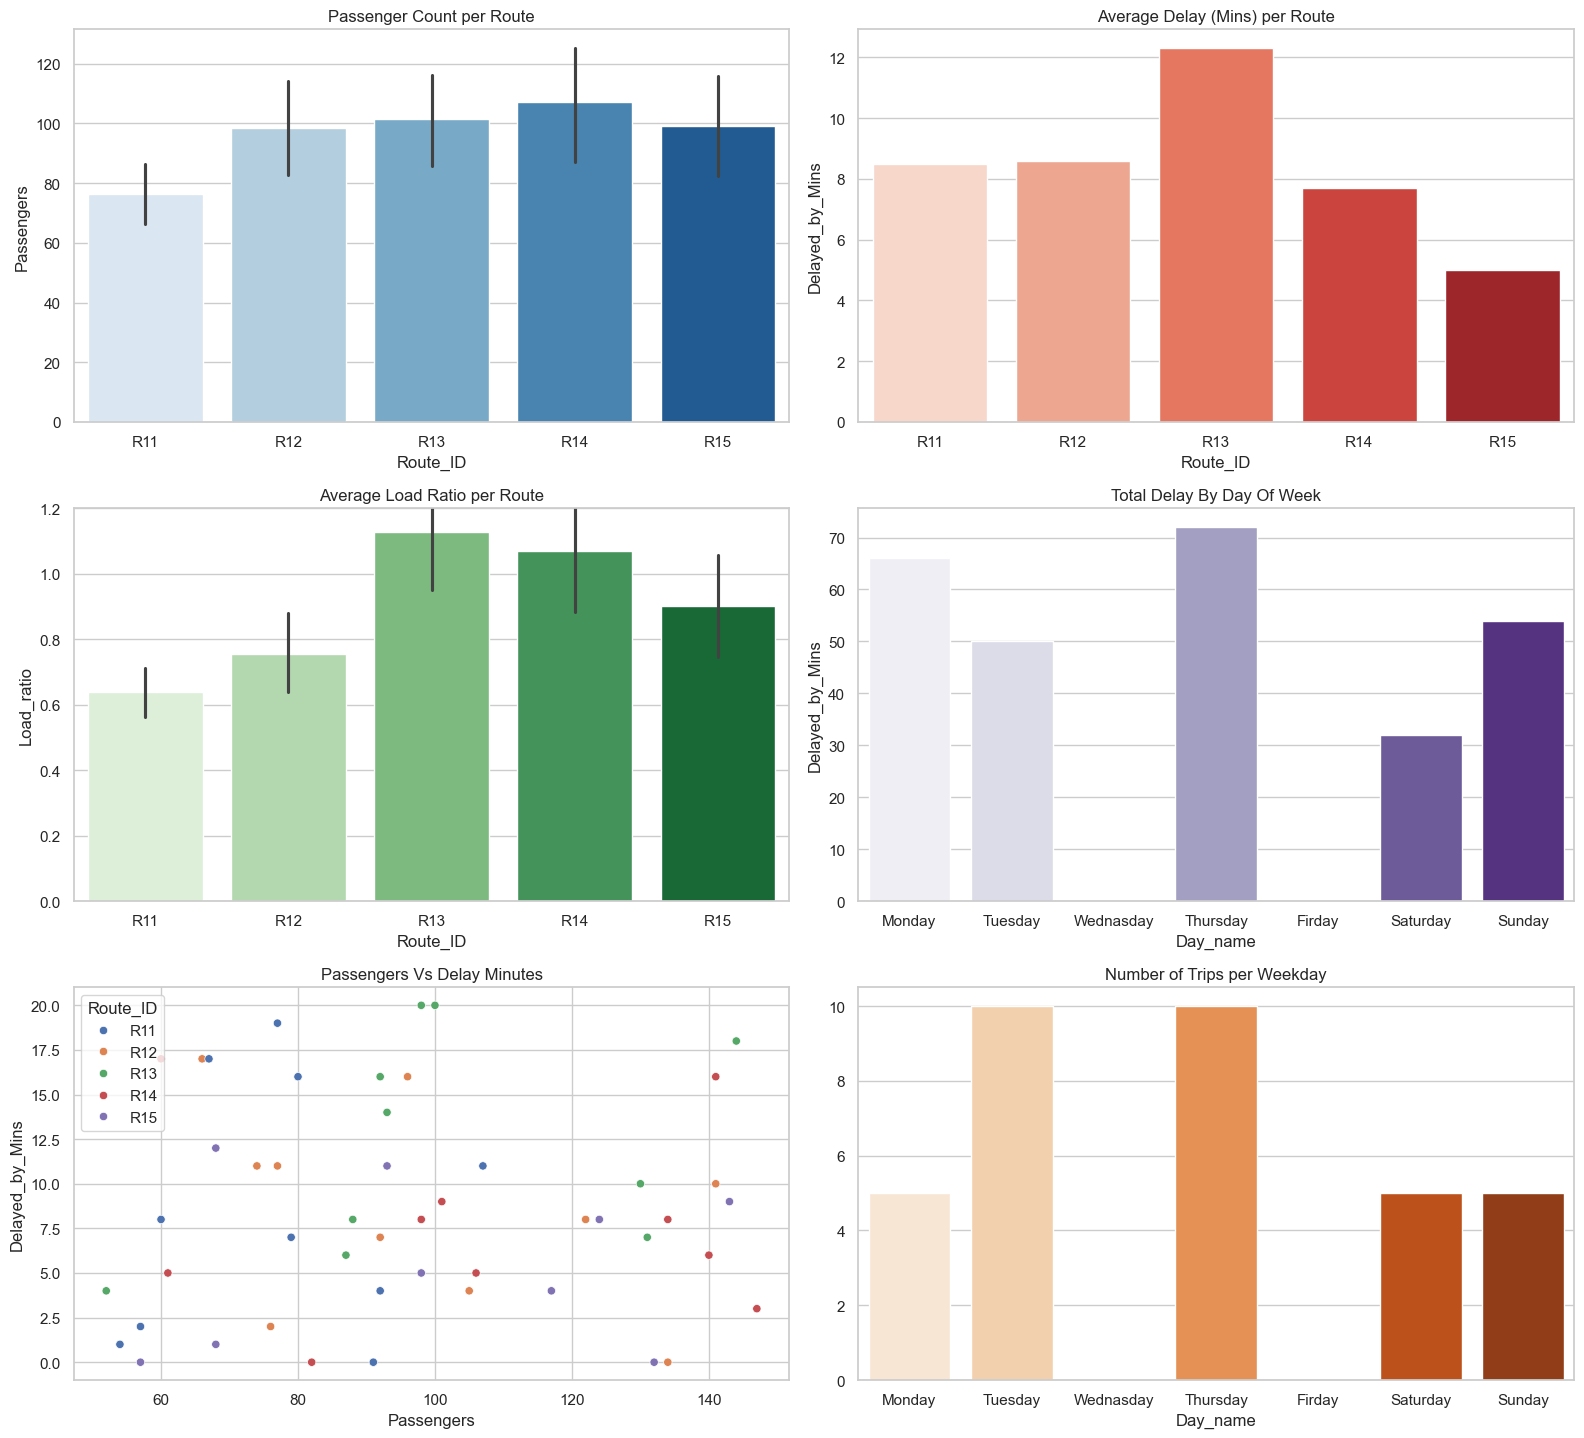

In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading clean data
df=pd.read_csv('transport_data.csv')

#set global theme 
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(8,5)

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(16,15))

# 1. passengers per route
sns.barplot(data=df,x='Route_ID',y='Passengers', ax=axes[0,0],palette='Blues')
axes[0,0].set_title('Passenger Count per Route')

# 2. Average Delay per Route
avg_delay=df.groupby('Route_ID')['Delayed_by_Mins'].mean().reset_index()
sns.barplot(data=avg_delay,x='Route_ID',y='Delayed_by_Mins',ax=axes[0,1],palette='Reds')
axes[0,1].set_title('Average Delay (Mins) per Route')

# 3. Load Ratio per Route
sns.barplot(data=df,x='Route_ID',y='Load_ratio',estimator='mean',ax=axes[1,0],palette='Greens')
axes[1,0].set_title('Average Load Ratio per Route')
axes[1,0].set_ylim(0,1.2)

# 4. Delay by weekday
delay_by_day=df.groupby('Day_name')['Delayed_by_Mins'].sum().reindex(['Monday','Tuesday','Wednasday','Thursday','Firday','Saturday','Sunday']).reset_index()
sns.barplot(data=delay_by_day,x='Day_name',y='Delayed_by_Mins',ax=axes[1,1],palette='Purples')
axes[1,1].set_title('Total Delay By Day Of Week')

# 5. Scatter: passengers Vs delay
sns.scatterplot(data=df,x='Passengers',y='Delayed_by_Mins',hue='Route_ID',ax=axes[2,0])
axes[2,0].set_title('Passengers Vs Delay Minutes')

# 6. Trips per Week Day
trip_counts = df['Day_name'].value_counts().reindex(['Monday','Tuesday','Wednasday','Thursday','Firday','Saturday','Sunday'])
sns.barplot(x=trip_counts.index,y=trip_counts.values,ax=axes[2,1],palette='Oranges')
axes[2,1].set_title('Number of Trips per Weekday')

#  Final Layout
plt.tight_layout(rect=[0,0,1,0.97])
plt.savefig('public_transport_final_dashboard.png')
plt.show()